# Results Visualisation 
---


## Contents
---

1. [DATA](#IMPORT-DATA)
    1. [ERRORS AND DISTANCE](#ERRORS-AND-DISTANCE)
    1. [ACCURACY AND DISTANCE](#PLOT-ACCURACY-ACCORDING-TO-DISTANCE)
    1. [ACCURACY AND ELLIPTICITY COMPONENTS](#PLOT-ACCURACY-ACCORDING-TO-$e1,-e2$)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# IMPORT DATA

In [2]:
testpath = '/Users/lacan/Documents/Cosmostat/Codes/BlendHunter'

In [3]:
sigmas = np.array([[5,51,52 ,53, 54],
                  [14,141,142,143,144],
                  [18,181,182,183,184],
                  [26,261,262,263,264],
                  [35,351,352,353,354],
                  [40,401,402,403,404]])

### Bh results

In [4]:
path_results = testpath+'/bh/bh_results'

#Import 
results5 = [np.load(path_results+'/pred_{}.npy'.format(i), allow_pickle = True) for i in sigmas[0]]
results14 = [np.load(path_results+'/pred_{}.npy'.format(i), allow_pickle = True) for i in sigmas[1]]
results18 = [np.load(path_results+'/pred_{}.npy'.format(i), allow_pickle = True) for i in sigmas[2]]
results26 = [np.load(path_results+'/pred_{}.npy'.format(i), allow_pickle = True) for i in sigmas[3]]
results35 = [np.load(path_results+'/pred_{}.npy'.format(i), allow_pickle = True) for i in sigmas[4]]
results40 = [np.load(path_results+'/pred_{}.npy'.format(i), allow_pickle = True) for i in sigmas[5]]

### Sep results

In [5]:
#Total results
paths_flags5 = np.array([testpath+'/sep_results_8000/flags{}.npy'.format(i) for i in sigmas[0]])
paths_flags14 = np.array([testpath+'/sep_results_8000/flags{}.npy'.format(i) for i in sigmas[1]])
paths_flags18 = np.array([testpath+'/sep_results_8000/flags{}.npy'.format(i) for i in sigmas[2]])
paths_flags26 = np.array([testpath+'/sep_results_8000/flags{}.npy'.format(i) for i in sigmas[3]])
paths_flags35 = np.array([testpath+'/sep_results_8000/flags{}.npy'.format(i) for i in sigmas[4]])
paths_flags40 = np.array([testpath+'/sep_results_8000/flags{}.npy'.format(i) for i in sigmas[5]])

In [6]:
#Import function
def import_(path):
    img = np.load(path, allow_pickle=True)
    return img

In [7]:
#Import flags
flags5 = [import_(paths_flags5[j]) for j in range(5)]
flags14 = [import_(paths_flags14[j]) for j in range(5)]
flags18 = [import_(paths_flags18[j]) for j in range(5)]
flags26 = [import_(paths_flags26[j]) for j in range(5)]
flags35 = [import_(paths_flags35[j]) for j in range(5)]
flags40 = [import_(paths_flags40[j]) for j in range(5)]

### Distance

In [8]:
#X parameter extracted from test images
param_x = np.load(testpath+"/bh/param_x_total.npy", allow_pickle=True)[36000:40000]

#Y parameter extracted from test images
param_y = np.load(testpath+"/bh/param_y_total.npy", allow_pickle=True)[36000:40000]

#Compute distance
distance = np.sqrt(param_x**2 + param_y**2)
distance = np.array([distance[i][0] for i in range(len(distance))])

### Ellipticity components

In [9]:
#e1 parameter extracted from test images
e1 = np.load(testpath+"/bh/e1_total.npy", allow_pickle=True)[36000:40000]

#e2 parameter extracted from test images
e2 = np.load(testpath+"/bh/e2_total.npy", allow_pickle=True)[36000:40000]

In [10]:
e1 = np.array([e1[i][0] for i in range(len(e1))])
e2 = np.array([e2[i][0] for i in range(len(e2))])

## ERRORS AND DISTANCE

In [11]:
#Errors bh
errors5 = [np.where(results5[i][0:4000] != 'blended')[0] for i in range(5)]
errors14 = [np.where(results14[i][0:4000] != 'blended')[0] for i in range(5)]
errors18 = [np.where(results18[i][0:4000] != 'blended')[0] for i in range(5)]
errors26 = [np.where(results26[i][0:4000] != 'blended')[0] for i in range(5)]
errors35 = [np.where(results35[i][0:4000] != 'blended')[0] for i in range(5)]
errors40 = [np.where(results40[i][0:4000] != 'blended')[0] for i in range(5)]

In [12]:
#Errors sep
errors5_sep = [np.where(flags5[i][0:4000] !=1)[0] for i in range(5)]
errors14_sep = [np.where(flags14[i][0:4000] !=1)[0] for i in range(5)]
errors18_sep = [np.where(flags18[i][0:4000] !=1)[0] for i in range(5)]
errors26_sep = [np.where(flags26[i][0:4000] !=1)[0] for i in range(5)]
errors35_sep = [np.where(flags35[i][0:4000] !=1)[0] for i in range(5)]
errors40_sep = [np.where(flags40[i][0:4000] !=1)[0] for i in range(5)]

In [11]:
#Get distance for missed blends by bh and sep
dist5 = [[distance[i] for i in errors5[j]] for j in range(5)]
dist14 = [[distance[i] for i in errors14[j]] for j in range(5)]
dist18 = [[distance[i] for i in errors18[j]] for j in range(5)]
dist26 = [[distance[i] for i in errors26[j]] for j in range(5)]
dist35 = [[distance[i] for i in errors35[j]] for j in range(5)]
dist40 = [[distance[i] for i in errors40[j]] for j in range(5)]

dist5_sep = [[distance[i] for i in errors5_sep[j]] for j in range(5)]
dist14_sep = [[distance[i] for i in errors14_sep[j]] for j in range(5)]
dist18_sep = [[distance[i] for i in errors18_sep[j]] for j in range(5)]
dist26_sep = [[distance[i] for i in errors26_sep[j]] for j in range(5)]
dist35_sep = [[distance[i] for i in errors35_sep[j]] for j in range(5)]
dist40_sep = [[distance[i] for i in errors40_sep[j]] for j in range(5)]

### Histograms

/Users/lacan/miniconda3/envs/deblending/lib/python3.7/site-packages/ipykernel_launcher.py:65: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


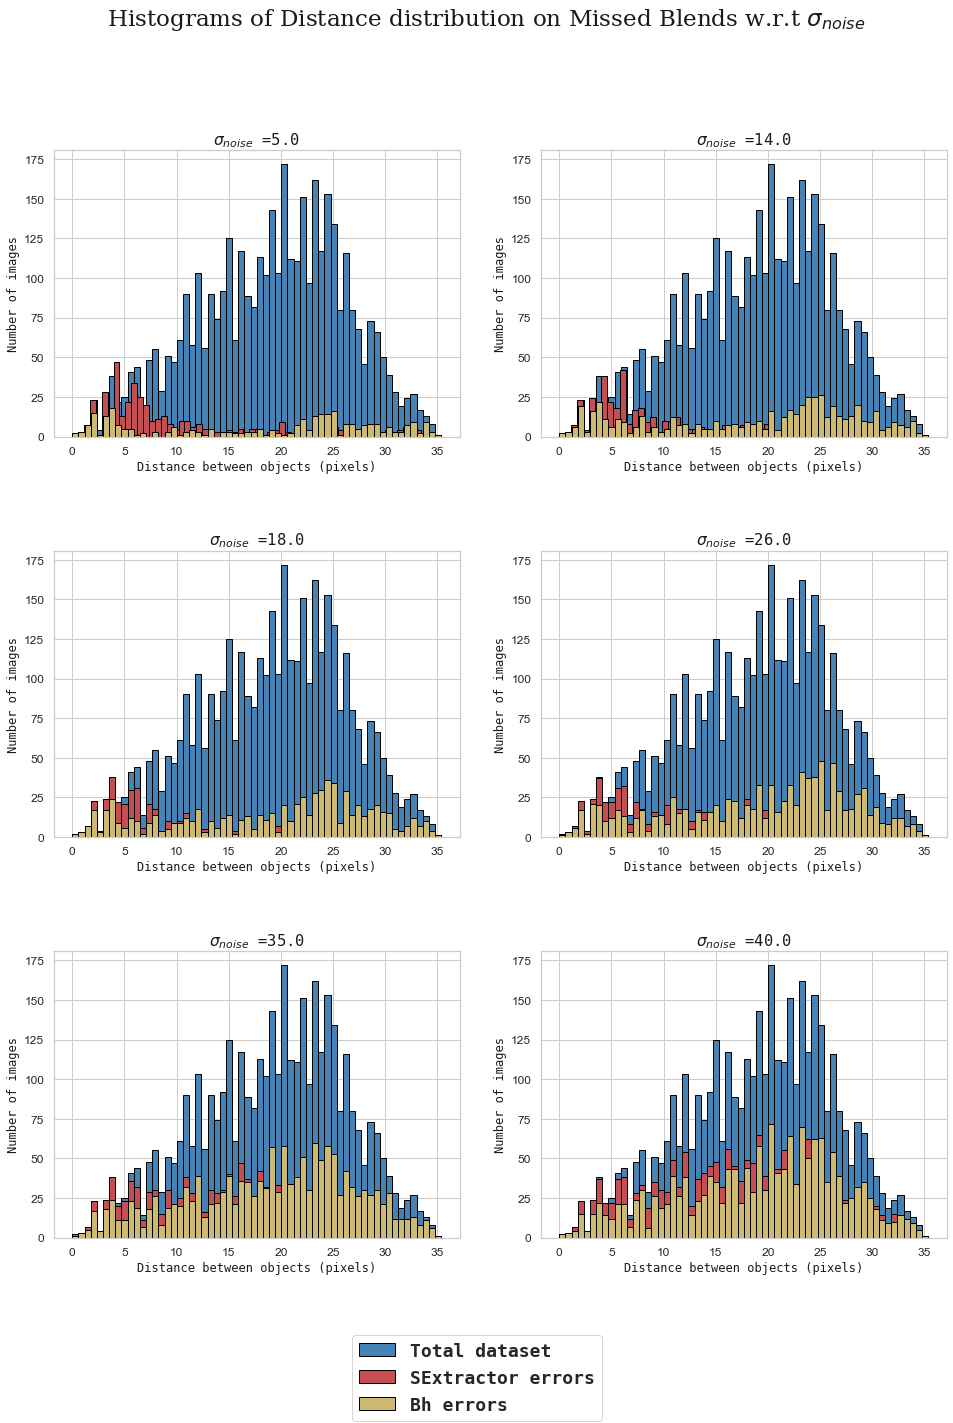

In [62]:
#Seaborn theme
sns.set(context='notebook', style='whitegrid', palette='deep')
#Font dictionnary
font = {'family': 'monospace',
        'color':  'k',
        'weight': 'normal',
        'size': 12}
#Start plot
fig, ax = plt.subplots(3,2,figsize=(16,20), sharex=False)
#Title
fig.suptitle('Histograms of Distance distribution on Missed Blends w.r.t $\sigma_{noise}$', 
             fontdict = {'family': 'serif','color':  'k','weight': 'heavy','size': 23}, fontsize=23)
#First subplot 
ax[0,0].set_title('$\sigma_{noise}$ =5.0', fontdict=font, fontsize=15.5)
ax[0,0].hist(distance, color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,0].hist(dist5_sep[0], color = 'r', edgecolor = 'black', bins = int(180/3))
ax[0,0].hist(dist5[0], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,0].set_ylabel('Number of images', fontdict = font)
ax[0,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[0,0].tick_params(axis='both', which='major', labelsize=12)
#Second subplot 
ax[0,1].set_title('$\sigma_{noise}$ =14.0', fontdict=font, fontsize=15.5)
ax[0,1].hist(distance, color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,1].hist(dist14_sep[0], color = 'r', edgecolor = 'black', bins = int(180/3))
ax[0,1].hist(dist14[0], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,1].set_ylabel('Number of images', fontdict = font)
ax[0,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[0,1].tick_params(axis='both', which='major', labelsize=12)
#3rd subplot 
ax[1,0].set_title('$\sigma_{noise}$ =18.0', fontdict=font, fontsize=15.5)
ax[1,0].hist(distance, color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[1,0].hist(dist18_sep[0], color = 'r', edgecolor = 'black', bins = int(180/3))
ax[1,0].hist(dist18[0], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,0].set_ylabel('Number of images', fontdict = font)
ax[1,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[1,0].tick_params(axis='both', which='major', labelsize=12)
#4th subplot 
ax[1,1].set_title('$\sigma_{noise}$ =26.0', fontdict=font, fontsize=15.5)
ax[1,1].hist(distance, color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[1,1].hist(dist26_sep[0], color = 'r', edgecolor = 'black', bins = int(180/3))
ax[1,1].hist(dist26[0], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,1].set_ylabel('Number of images', fontdict = font)
ax[1,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[1,1].tick_params(axis='both', which='major', labelsize=12)
#5th subplot 
ax[2,0].set_title('$\sigma_{noise}$ =35.0', fontdict=font, fontsize=15.5)
ax[2,0].hist(distance, color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[2,0].hist(dist35_sep[0], color = 'r', edgecolor = 'black', bins = int(180/3))
ax[2,0].hist(dist35[0], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[2,0].set_ylabel('Number of images', fontdict = font)
ax[2,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[2,0].tick_params(axis='both', which='major', labelsize=12)
#6th subplot 
ax[2,1].set_title('$\sigma_{noise}$ =40.0', fontdict=font, fontsize=15.5)
x=ax[2,1].hist(distance, color = 'steelblue', edgecolor = 'black', bins = int(180/3))
y=ax[2,1].hist(dist40_sep[0], color = 'r', edgecolor = 'black', bins = int(180/3))
z=ax[2,1].hist(dist40[0], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[2,1].set_ylabel('Number of images', fontdict = font)
ax[2,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[2,1].tick_params(axis='both', which='major', labelsize=12)

plt.subplots_adjust(hspace=0.4)
#Add legend
labels_legend=["Total dataset", 'SExtractor errors', "Bh errors"]
fig.legend([x, y, z], labels=labels_legend, borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','weight': 'heavy','size': 18})
plt.show()

# ACCURACY AND DISTANCE

In [13]:
# How to retrieve informations from each bin in total dataset
def count_per_bin(data =None, get_mean_per_bin =False, get_bins =False, bins__=int(180/3)):
    (n, bins, patches) = plt.hist(data, bins = bins__)
    if get_mean_per_bin:
        return n, bins[1:]
    if get_bins:
        return n, bins[1:], bins
    else:
        return n
    
# Computation of error ratios
def error_ratio_bins(data=None, total=None, bins__=int(180/3)):
    n = count_per_bin(data, bins__=bins__)
    ratio = n/total
    
    return ratio

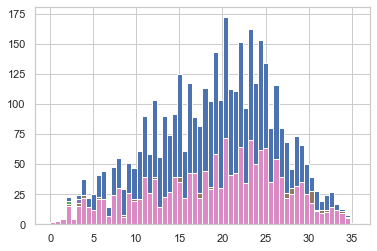

In [275]:
##BLENDHUNTER
#Get total number per bin and mean distance per bin for the whole test set
n_total, mean_dist, bin_edges = count_per_bin(data=distance, get_bins=True)

#Important to retrieve the bin edges in order to compute the accuracy on the corresponding bins!

#Get the ratios for each noise realisation (bh errors)
ratios5 = [error_ratio_bins(dist5[j], total=n_total , bins__=bin_edges) for j in range(len(dist5))]
ratios14 = [error_ratio_bins(dist14[j], total=n_total, bins__=bin_edges) for j in range(len(dist14))]
ratios18 = [error_ratio_bins(dist18[j], total=n_total, bins__=bin_edges) for j in range(len(dist18))]
ratios26 = [error_ratio_bins(dist26[j], total=n_total, bins__=bin_edges) for j in range(len(dist26))]
ratios35 = [error_ratio_bins(dist35[j], total=n_total, bins__=bin_edges) for j in range(len(dist35))]
ratios40 = [error_ratio_bins(dist40[j], total=n_total, bins__=bin_edges) for j in range(len(dist40))]

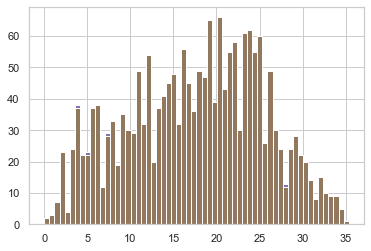

In [276]:
##SEXTRACTOR
#Get the ratios
ratios5_sep = [error_ratio_bins(dist5_sep[j], total=n_total, bins__=bin_edges) for j in range(len(dist5_sep))]
ratios14_sep = [error_ratio_bins(dist14_sep[j], total=n_total, bins__=bin_edges) for j in range(len(dist14_sep))]
ratios18_sep = [error_ratio_bins(dist18_sep[j], total=n_total, bins__=bin_edges) for j in range(len(dist18_sep))]
ratios26_sep = [error_ratio_bins(dist26_sep[j], total=n_total, bins__=bin_edges) for j in range(len(dist26_sep))]
ratios35_sep = [error_ratio_bins(dist35_sep[j], total=n_total, bins__=bin_edges) for j in range(len(dist35_sep))]
ratios40_sep = [error_ratio_bins(dist40_sep[j], total=n_total, bins__=bin_edges) for j in range(len(dist40_sep))]

In [39]:
## Compute means and std

def get_mean(data=None):
    return np.mean(data)

def get_std(data=None):
    return np.std(data)

#Sub list of ratios
sub_ratios5 = [np.array([ratios5[i][j] for i in range(5)]) for j in range(60)]
sub_ratios14 = [np.array([ratios14[i][j] for i in range(5)]) for j in range(60)]
sub_ratios18 = [np.array([ratios18[i][j] for i in range(5)]) for j in range(60)]
sub_ratios26 = [np.array([ratios26[i][j] for i in range(5)]) for j in range(60)]
sub_ratios35 = [np.array([ratios35[i][j] for i in range(5)]) for j in range(60)]
sub_ratios40 = [np.array([ratios40[i][j] for i in range(5)]) for j in range(60)]

sub_ratios5_sep = [np.array([ratios5_sep[i][j] for i in range(5)]) for j in range(60)]
sub_ratios14_sep = [np.array([ratios14_sep[i][j] for i in range(5)]) for j in range(60)]
sub_ratios18_sep = [np.array([ratios18_sep[i][j] for i in range(5)]) for j in range(60)]
sub_ratios26_sep = [np.array([ratios26_sep[i][j] for i in range(5)]) for j in range(60)]
sub_ratios35_sep = [np.array([ratios35_sep[i][j] for i in range(5)]) for j in range(60)]
sub_ratios40_sep = [np.array([ratios40_sep[i][j] for i in range(5)]) for j in range(60)]

In [76]:
#Mean and std deviation on all noise realisations
mean_ratios = [np.array([get_mean(data=k[i]) for i in range(len(k))]) for k in [sub_ratios5,sub_ratios14,sub_ratios18,sub_ratios26,sub_ratios35,sub_ratios40]]
mean_ratios_sep = [np.array([get_mean(data=k[i]) for i in range(len(k))]) for k in [sub_ratios5_sep,sub_ratios14_sep,sub_ratios18_sep,sub_ratios26_sep,sub_ratios35_sep,sub_ratios40_sep]]

std_ratios = [[get_std(data=100*(1-k[i])) for i in range(len(k))] for k in [sub_ratios5,sub_ratios14,sub_ratios18,sub_ratios26,sub_ratios35,sub_ratios40]]
std_ratios_sep = [[get_std(data=100*(1-k[i])) for i in range(len(k))] for k in [sub_ratios5_sep,sub_ratios14_sep,sub_ratios18_sep,sub_ratios26_sep,sub_ratios35_sep,sub_ratios40_sep]]

## PLOT ACCURACY ACCORDING TO DISTANCE

/Users/lacan/miniconda3/envs/deblending/lib/python3.7/site-packages/ipykernel_launcher.py:95: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


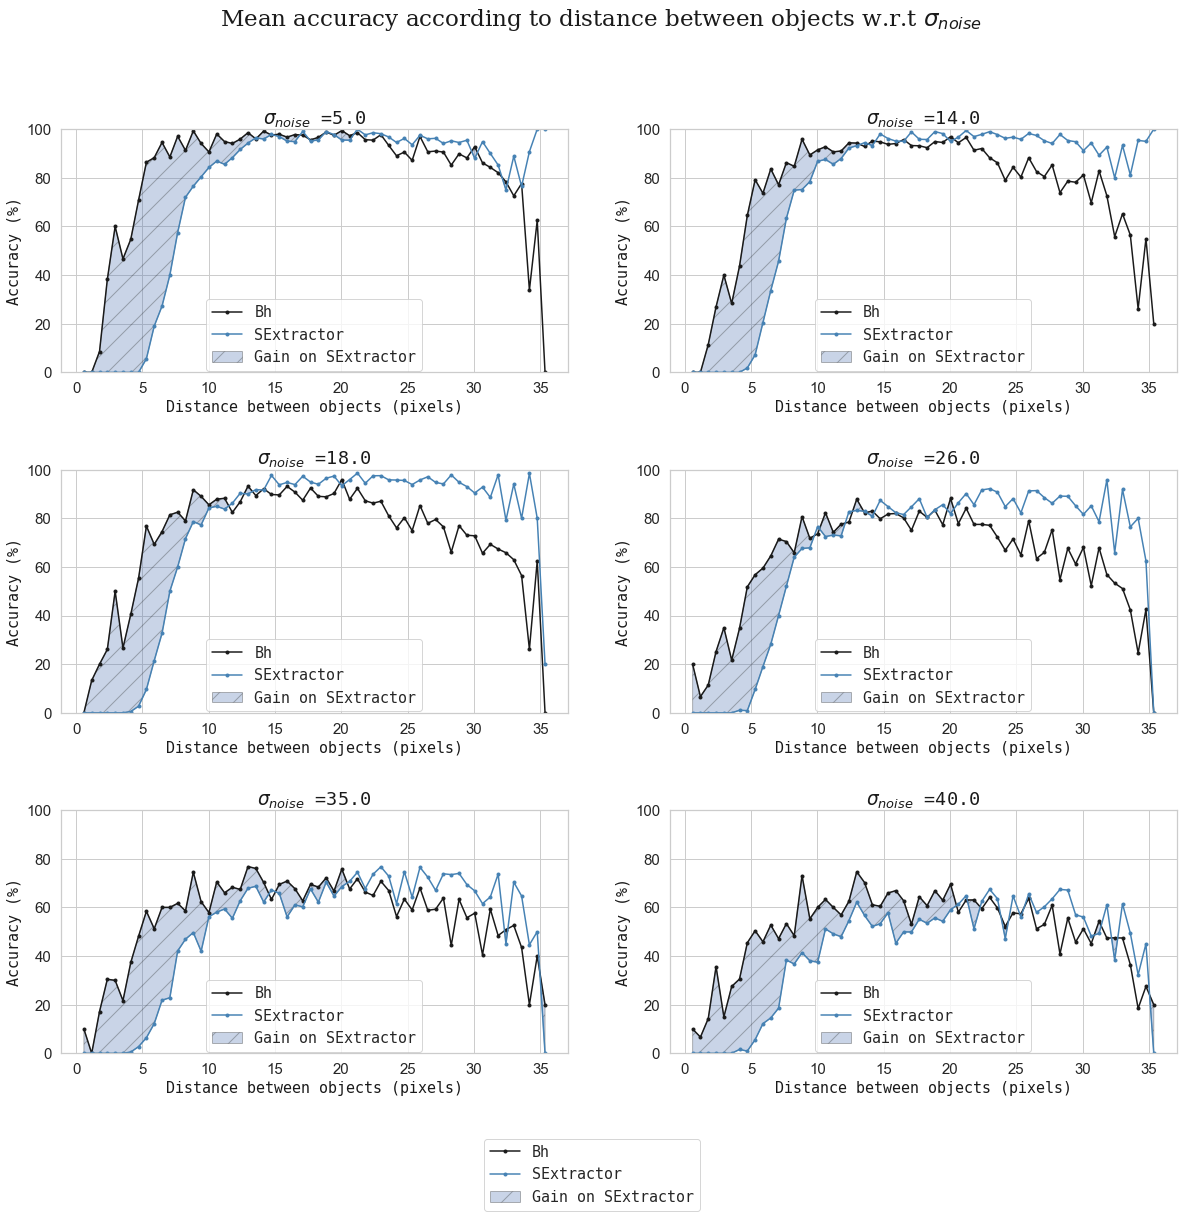

In [125]:
#Seaborn theme
sns.set(context='notebook', style='whitegrid', palette='deep')
#Font dictionnary
font = {'family': 'monospace',
        'color':  'k',
        'weight': 'normal',
        'size': 15}
#Start plot
fig, ax = plt.subplots(3,2,figsize=(20,17), sharex=False)
#Title
fig.suptitle('Mean accuracy according to distance between objects w.r.t $\sigma_{noise}$', 
             fontdict = {'family': 'serif','color':  'k','weight': 'heavy','size': 23}, fontsize=23)
#First subplot 
ax[0,0].set_title('$\sigma_{noise}$ =5.0', fontdict=font, fontsize=18.5)
ax[0,0].plot(mean_dist, 100*(1-mean_ratios[0]), color = 'k', marker='.', label='Bh')
ax[0,0].plot(mean_dist, 100*(1-mean_ratios_sep[0]), color = 'steelblue', marker='.', label='SExtractor')
ax[0,0].set_ylabel('Accuracy (%)', fontdict = font)
ax[0,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[0,0].set_ylim(0,100)
ax[0,0].tick_params(axis='both', which='major', labelsize=15)


ax[0,0].fill_between(mean_dist, 100*(1-mean_ratios[0]), y2=100*(1-mean_ratios_sep[0]),
                     where=100*(1-mean_ratios[0]) >100*(1-mean_ratios_sep[0]), interpolate=True, hatch="/", edgecolor="k", alpha=0.3 ,label='Gain on SExtractor')
ax[0,0].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#Second subplot 
ax[0,1].set_title('$\sigma_{noise}$ =14.0', fontdict=font, fontsize=18.5)
ax[0,1].plot(mean_dist, 100*(1-mean_ratios[1]), color = 'k', marker='.', label='Bh')
ax[0,1].plot(mean_dist, 100*(1-mean_ratios_sep[1]), color = 'steelblue', marker='.', label='SExtractor')
ax[0,1].set_ylabel('Accuracy (%)', fontdict = font)
ax[0,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[0,1].set_ylim(0,100)
ax[0,1].tick_params(axis='both', which='major', labelsize=15)

ax[0,1].fill_between(mean_dist, 100*(1-mean_ratios[1]), y2=100*(1-mean_ratios_sep[1]),
                     where=100*(1-mean_ratios[1]) >100*(1-mean_ratios_sep[1]), interpolate=True, hatch="/", edgecolor="k", alpha=0.3 ,label='Gain on SExtractor')
ax[0,1].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#3rd subplot 
ax[1,0].set_title('$\sigma_{noise}$ =18.0', fontdict=font, fontsize=18.5)
ax[1,0].plot(mean_dist, 100*(1-mean_ratios[2]), color = 'k', marker='.', label='Bh')
ax[1,0].plot(mean_dist, 100*(1-mean_ratios_sep[2]), color = 'steelblue', marker='.', label='SExtractor')
ax[1,0].set_ylabel('Accuracy (%)', fontdict = font)
ax[1,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[1,0].set_ylim(0,100)
ax[1,0].tick_params(axis='both', which='major', labelsize=15)

ax[1,0].fill_between(mean_dist, 100*(1-mean_ratios[2]), y2=100*(1-mean_ratios_sep[2]),
                     where=100*(1-mean_ratios[2]) >100*(1-mean_ratios_sep[2]), interpolate=True, hatch="/", edgecolor="k", alpha=0.3 ,label='Gain on SExtractor')
ax[1,0].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#4th subplot 
ax[1,1].set_title('$\sigma_{noise}$ =26.0', fontdict=font, fontsize=18.5)
ax[1,1].plot(mean_dist, 100*(1-mean_ratios[3]), color = 'k', marker='.', label='Bh')
ax[1,1].plot(mean_dist, 100*(1-mean_ratios_sep[3]), color = 'steelblue', marker='.', label='SExtractor')
ax[1,1].set_ylabel('Accuracy (%)', fontdict = font)
ax[1,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[1,1].set_ylim(0,100)
ax[1,1].tick_params(axis='both', which='major', labelsize=15)

ax[1,1].fill_between(mean_dist, 100*(1-mean_ratios[3]), y2=100*(1-mean_ratios_sep[3]),
                     where=100*(1-mean_ratios[3]) >100*(1-mean_ratios_sep[3]), interpolate=True, hatch="/", edgecolor="k", alpha=0.3 ,label='Gain on SExtractor')
ax[1,1].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#5th subplot 
ax[2,0].set_title('$\sigma_{noise}$ =35.0', fontdict=font, fontsize=18.5)
ax[2,0].plot(mean_dist, 100*(1-mean_ratios[4]),color = 'k', marker='.', label='Bh')
ax[2,0].plot(mean_dist, 100*(1-mean_ratios_sep[4]), color = 'steelblue', marker='.', label='SExtractor')
ax[2,0].set_ylabel('Accuracy (%)', fontdict = font)
ax[2,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[2,0].set_ylim(0,100)
ax[2,0].tick_params(axis='both', which='major', labelsize=15)

ax[2,0].fill_between(mean_dist, 100*(1-mean_ratios[4]), y2=100*(1-mean_ratios_sep[4]),
                     where=100*(1-mean_ratios[4]) >100*(1-mean_ratios_sep[4]), interpolate=True, hatch="/", edgecolor="k", alpha=0.3,label='Gain on SExtractor' )
ax[2,0].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#6th subplot 
ax[2,1].set_title('$\sigma_{noise}$ =40.0', fontdict=font, fontsize=18.5)
x=ax[2,1].plot(mean_dist, 100*(1-mean_ratios[5]), color = 'k', marker='.', label='Bh')
y=ax[2,1].plot(mean_dist, 100*(1-mean_ratios_sep[5]), color = 'steelblue', marker='.', label='SExtractor')
ax[2,1].set_ylabel('Accuracy (%)', fontdict = font)
ax[2,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[2,1].set_ylim(0,100)
ax[2,1].tick_params(axis='both', which='major', labelsize=15)

z=ax[2,1].fill_between(mean_dist, 100*(1-mean_ratios[5]), y2=100*(1-mean_ratios_sep[5]),
                     where=100*(1-mean_ratios[5]) >100*(1-mean_ratios_sep[5]), interpolate = True,hatch="/", edgecolor="k",alpha=0.3 ,label='Gain on SExtractor')
ax[2,1].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#Add legend
labels_legend=["Bh", 'SExtractor', 'Gain on SExtractor']
plt.subplots_adjust(hspace=0.4)
fig.legend([x,y,z], labels=labels_legend, borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})
plt.show()

/Users/lacan/miniconda3/envs/deblending/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


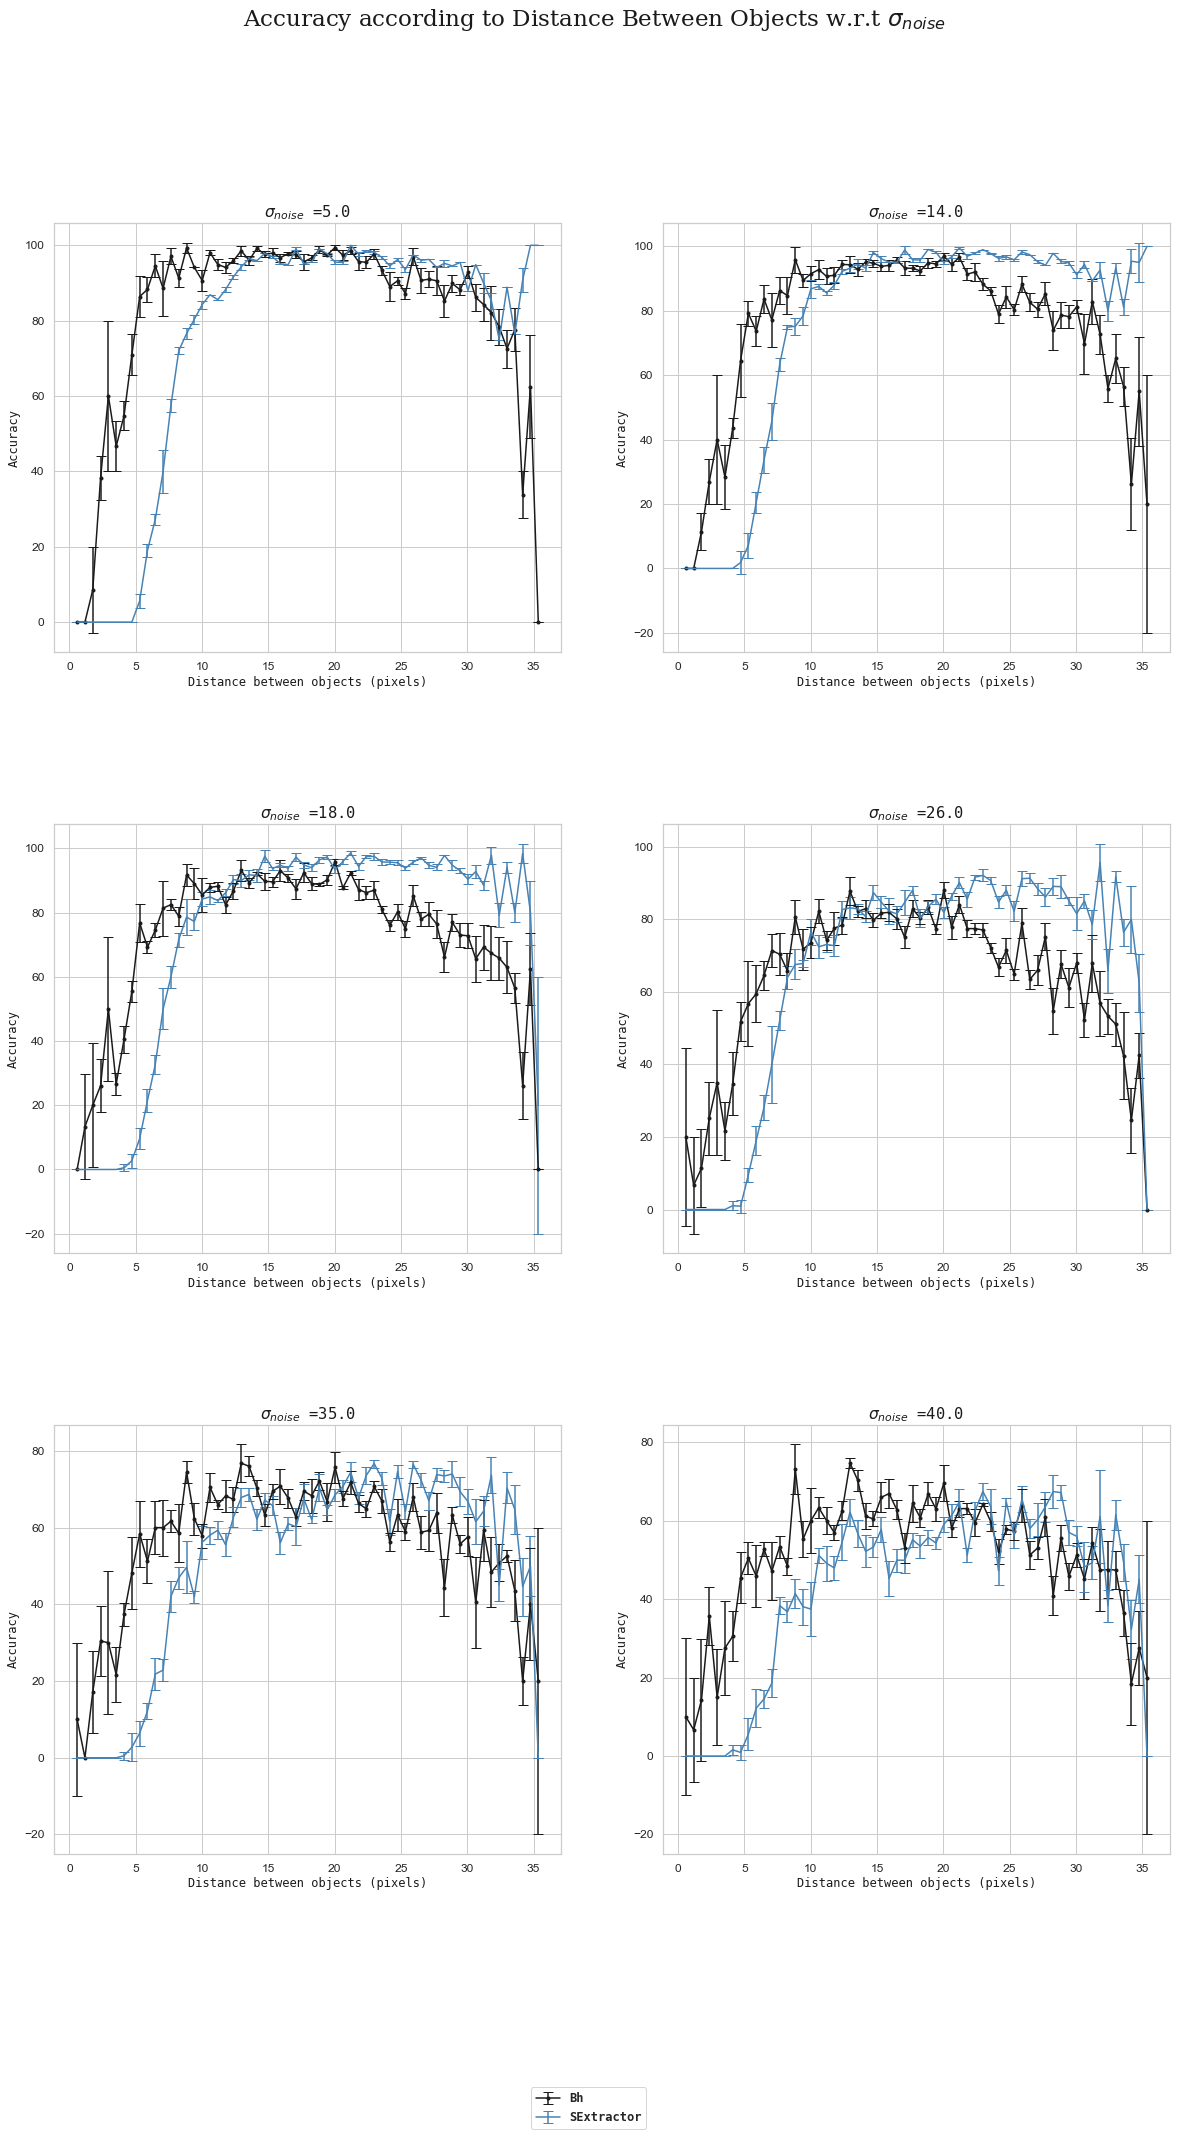

In [78]:
import matplotlib
matplotlib.rcParams.update({'errorbar.capsize': 5})
#Seaborn theme
sns.set(context='notebook', style='whitegrid', palette='deep')
#Font dictionnary
font = {'family': 'monospace',
        'color':  'k',
        'weight': 'normal',
        'size': 12}
#Start plot
fig, ax = plt.subplots(3,2,figsize=(20,30), sharex=False)
#Title
fig.suptitle('Accuracy according to Distance Between Objects w.r.t $\sigma_{noise}$', 
             fontdict = {'family': 'serif','color':  'k','weight': 'heavy','size': 23}, fontsize=23)
#First subplot 
ax[0,0].set_title('$\sigma_{noise}$ =5.0', fontdict=font, fontsize=15.5)
ax[0,0].errorbar(mean_dist, 100*(1-mean_ratios[0]), yerr= std_ratios[0], color = 'k',fmt='.-')
ax[0,0].errorbar(mean_dist, 100*(1-mean_ratios_sep[0]), yerr= std_ratios_sep[0],color = 'steelblue')
ax[0,0].set_ylabel('Accuracy', fontdict = font)
ax[0,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[0,0].tick_params(axis='both', which='major', labelsize=12)
#Second subplot 
ax[0,1].set_title('$\sigma_{noise}$ =14.0', fontdict=font, fontsize=15.5)
ax[0,1].errorbar(mean_dist, 100*(1-mean_ratios[1]), yerr= std_ratios[1],color = 'k',fmt='.-')
ax[0,1].errorbar(mean_dist, 100*(1-mean_ratios_sep[1]), yerr= std_ratios_sep[1],color = 'steelblue')
ax[0,1].set_ylabel('Accuracy', fontdict = font)
ax[0,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[0,1].tick_params(axis='both', which='major', labelsize=12)
#3rd subplot 
ax[1,0].set_title('$\sigma_{noise}$ =18.0', fontdict=font, fontsize=15.5)
ax[1,0].errorbar(mean_dist, 100*(1-mean_ratios[2]), yerr= std_ratios[2],color = 'k',fmt='.-')
ax[1,0].errorbar(mean_dist, 100*(1-mean_ratios_sep[2]), yerr= std_ratios_sep[2],color = 'steelblue')
ax[1,0].set_ylabel('Accuracy', fontdict = font)
ax[1,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[1,0].tick_params(axis='both', which='major', labelsize=12)
#4th subplot 
ax[1,1].set_title('$\sigma_{noise}$ =26.0', fontdict=font, fontsize=15.5)
ax[1,1].errorbar(mean_dist, 100*(1-mean_ratios[3]), yerr= std_ratios[3],color = 'k',fmt='.-')
ax[1,1].errorbar(mean_dist, 100*(1-mean_ratios_sep[3]), yerr= std_ratios_sep[3],color = 'steelblue')
ax[1,1].set_ylabel('Accuracy', fontdict = font)
ax[1,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[1,1].tick_params(axis='both', which='major', labelsize=12)
#5th subplot 
ax[2,0].set_title('$\sigma_{noise}$ =35.0', fontdict=font, fontsize=15.5)
ax[2,0].errorbar(mean_dist, 100*(1-mean_ratios[4]), yerr= std_ratios[4],color = 'k',fmt='.-')
ax[2,0].errorbar(mean_dist, 100*(1-mean_ratios_sep[4]),yerr= std_ratios_sep[4], color = 'steelblue')
ax[2,0].set_ylabel('Accuracy', fontdict = font)
ax[2,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[2,0].tick_params(axis='both', which='major', labelsize=12)
#6th subplot 
ax[2,1].set_title('$\sigma_{noise}$ =40.0', fontdict=font, fontsize=15.5)
x=ax[2,1].errorbar(mean_dist, 100*(1-mean_ratios[5]), yerr= std_ratios[5],color = 'k',fmt='.-')
y=ax[2,1].errorbar(mean_dist, 100*(1-mean_ratios_sep[5]), yerr= std_ratios_sep[5],color = 'steelblue')
ax[2,1].set_ylabel('Accuracy', fontdict = font)
ax[2,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[2,1].tick_params(axis='both', which='major', labelsize=12)

#Add legend
labels_legend=["Bh", 'SExtractor']
plt.subplots_adjust(hspace=0.4)
fig.legend([x,y], labels=labels_legend, borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','weight': 'heavy','size': 12})
plt.show()

# ACCURACY AND ELLIPTICITY COMPONENTS

In [14]:
#Get e for missed blends by bh and sep
e5 = [[(e1[i], e2[i]) for i in errors5[j]] for j in range(5)]
e14 = [[(e1[i], e2[i]) for i in errors14[j]] for j in range(5)]
e18 = [[(e1[i], e2[i]) for i in errors18[j]] for j in range(5)]
e26 = [[(e1[i], e2[i]) for i in errors26[j]] for j in range(5)]
e35 = [[(e1[i], e2[i]) for i in errors35[j]] for j in range(5)]
e40 = [[(e1[i], e2[i]) for i in errors40[j]] for j in range(5)]

e5_sep = [[(e1[i], e2[i]) for i in errors5_sep[j]] for j in range(5)]
e14_sep = [[(e1[i], e2[i]) for i in errors14_sep[j]] for j in range(5)]
e18_sep = [[(e1[i], e2[i]) for i in errors18_sep[j]] for j in range(5)]
e26_sep = [[(e1[i], e2[i]) for i in errors26_sep[j]] for j in range(5)]
e35_sep = [[(e1[i], e2[i]) for i in errors35_sep[j]] for j in range(5)]
e40_sep = [[(e1[i], e2[i]) for i in errors40_sep[j]] for j in range(5)]

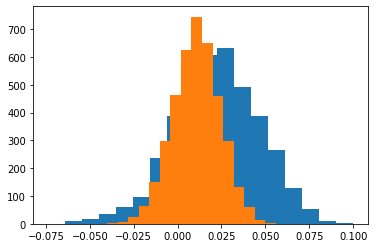

In [16]:
##BLENDHUNTER
#Get total number per bin and mean distance per bin for the whole test set
n_total_e1, mean_e1, bin_edges_e1 = count_per_bin(data=e1, get_bins=True ,bins__=int(36/2))
n_total_e2, mean_e2, bin_edges_e2 = count_per_bin(data=e2, get_bins=True , bins__=int(36/2))

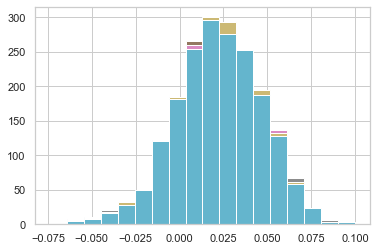

In [26]:
#Important to retrieve the bin edges in order to compute the accuracy on the corresponding bins!

#Get the ratios for each noise realisation (bh errors)
ratios5_e1 = [error_ratio_bins([e5[j][k][0] for k in range(len(e5[j]))], total=n_total_e1 , bins__=bin_edges_e1) for j in range(5)]
ratios14_e1 = [error_ratio_bins([e14[j][k][0] for k in range(len(e14[j]))], total=n_total_e1 , bins__=bin_edges_e1) for j in range(5)]
ratios18_e1 = [error_ratio_bins([e18[j][k][0] for k in range(len(e18[j]))], total=n_total_e1 , bins__=bin_edges_e1) for j in range(5)]
ratios26_e1 = [error_ratio_bins([e26[j][k][0] for k in range(len(e26[j]))], total=n_total_e1 , bins__=bin_edges_e1) for j in range(5)]
ratios35_e1 = [error_ratio_bins([e35[j][k][0] for k in range(len(e35[j]))], total=n_total_e1 , bins__=bin_edges_e1) for j in range(5)]
ratios40_e1 = [error_ratio_bins([e40[j][k][0] for k in range(len(e40[j]))], total=n_total_e1 , bins__=bin_edges_e1) for j in range(5)]

ratios5_e1_sep = [error_ratio_bins([e5_sep[j][k][0] for k in range(len(e5_sep[j]))], total=n_total_e1 , bins__=bin_edges_e1) for j in range(5)]
ratios14_e1_sep = [error_ratio_bins([e14_sep[j][k][0] for k in range(len(e14_sep[j]))], total=n_total_e1 , bins__=bin_edges_e1) for j in range(5)]
ratios18_e1_sep = [error_ratio_bins([e18_sep[j][k][0] for k in range(len(e18_sep[j]))], total=n_total_e1 , bins__=bin_edges_e1) for j in range(5)]
ratios26_e1_sep = [error_ratio_bins([e26_sep[j][k][0] for k in range(len(e26_sep[j]))], total=n_total_e1 , bins__=bin_edges_e1) for j in range(5)]
ratios35_e1_sep = [error_ratio_bins([e35_sep[j][k][0] for k in range(len(e35_sep[j]))], total=n_total_e1 , bins__=bin_edges_e1) for j in range(5)]
ratios40_e1_sep = [error_ratio_bins([e40_sep[j][k][0] for k in range(len(e40_sep[j]))], total=n_total_e1 , bins__=bin_edges_e1) for j in range(5)]


ratios5_e2 = [error_ratio_bins([e5[j][k][1] for k in range(len(e5[j]))], total=n_total_e2 , bins__=bin_edges_e2) for j in range(5)]
ratios14_e2 = [error_ratio_bins([e14[j][k][1] for k in range(len(e14[j]))], total=n_total_e2 , bins__=bin_edges_e2) for j in range(5)]
ratios18_e2 = [error_ratio_bins([e18[j][k][1] for k in range(len(e18[j]))], total=n_total_e2 , bins__=bin_edges_e2) for j in range(5)]
ratios26_e2 = [error_ratio_bins([e26[j][k][1] for k in range(len(e26[j]))], total=n_total_e2 , bins__=bin_edges_e2) for j in range(5)]
ratios35_e2 = [error_ratio_bins([e35[j][k][1] for k in range(len(e35[j]))], total=n_total_e2 , bins__=bin_edges_e2) for j in range(5)]
ratios40_e2 = [error_ratio_bins([e40[j][k][1] for k in range(len(e40[j]))], total=n_total_e2 , bins__=bin_edges_e2) for j in range(5)]

ratios5_e2_sep = [error_ratio_bins([e5_sep[j][k][1] for k in range(len(e5_sep[j]))], total=n_total_e2 , bins__=bin_edges_e2) for j in range(5)]
ratios14_e2_sep = [error_ratio_bins([e14_sep[j][k][1] for k in range(len(e14_sep[j]))], total=n_total_e2 , bins__=bin_edges_e2) for j in range(5)]
ratios18_e2_sep = [error_ratio_bins([e18_sep[j][k][1] for k in range(len(e18_sep[j]))], total=n_total_e2 , bins__=bin_edges_e2) for j in range(5)]
ratios26_e2_sep = [error_ratio_bins([e26_sep[j][k][1] for k in range(len(e26_sep[j]))], total=n_total_e2 , bins__=bin_edges_e2) for j in range(5)]
ratios35_e2_sep = [error_ratio_bins([e35_sep[j][k][1] for k in range(len(e35_sep[j]))], total=n_total_e2 , bins__=bin_edges_e2) for j in range(5)]
ratios40_e2_sep = [error_ratio_bins([e40_sep[j][k][1] for k in range(len(e40_sep[j]))], total=n_total_e2 , bins__=bin_edges_e2) for j in range(5)]

In [28]:
## Compute means and std

def get_mean(data=None):
    return np.mean(data)

def get_std(data=None):
    return np.std(data)

#Sub list of ratios
sub_ratios5_e1 = [np.array([ratios5_e1[i][j] for i in range(5)]) for j in range(18)]
sub_ratios14_e1 = [np.array([ratios14_e1[i][j] for i in range(5)]) for j in range(18)]
sub_ratios18_e1 = [np.array([ratios18_e1[i][j] for i in range(5)]) for j in range(18)]
sub_ratios26_e1 = [np.array([ratios26_e1[i][j] for i in range(5)]) for j in range(18)]
sub_ratios35_e1 = [np.array([ratios35_e1[i][j] for i in range(5)]) for j in range(18)]
sub_ratios40_e1 = [np.array([ratios40_e1[i][j] for i in range(5)]) for j in range(18)]

sub_ratios5_e1_sep = [np.array([ratios5_e1_sep[i][j] for i in range(5)]) for j in range(18)]
sub_ratios14_e1_sep = [np.array([ratios14_e1_sep[i][j] for i in range(5)]) for j in range(18)]
sub_ratios18_e1_sep = [np.array([ratios18_e1_sep[i][j] for i in range(5)]) for j in range(18)]
sub_ratios26_e1_sep = [np.array([ratios26_e1_sep[i][j] for i in range(5)]) for j in range(18)]
sub_ratios35_e1_sep = [np.array([ratios35_e1_sep[i][j] for i in range(5)]) for j in range(18)]
sub_ratios40_e1_sep = [np.array([ratios40_e1_sep[i][j] for i in range(5)]) for j in range(18)]

sub_ratios5_e2 = [np.array([ratios5_e2[i][j] for i in range(5)]) for j in range(18)]
sub_ratios14_e2 = [np.array([ratios14_e2[i][j] for i in range(5)]) for j in range(18)]
sub_ratios18_e2 = [np.array([ratios18_e2[i][j] for i in range(5)]) for j in range(18)]
sub_ratios26_e2 = [np.array([ratios26_e2[i][j] for i in range(5)]) for j in range(18)]
sub_ratios35_e2 = [np.array([ratios35_e2[i][j] for i in range(5)]) for j in range(18)]
sub_ratios40_e2 = [np.array([ratios40_e2[i][j] for i in range(5)]) for j in range(18)]

sub_ratios5_e2_sep = [np.array([ratios5_e2_sep[i][j] for i in range(5)]) for j in range(18)]
sub_ratios14_e2_sep = [np.array([ratios14_e2_sep[i][j] for i in range(5)]) for j in range(18)]
sub_ratios18_e2_sep = [np.array([ratios18_e2_sep[i][j] for i in range(5)]) for j in range(18)]
sub_ratios26_e2_sep = [np.array([ratios26_e2_sep[i][j] for i in range(5)]) for j in range(18)]
sub_ratios35_e2_sep = [np.array([ratios35_e2_sep[i][j] for i in range(5)]) for j in range(18)]
sub_ratios40_e2_sep = [np.array([ratios40_e2_sep[i][j] for i in range(5)]) for j in range(18)]

In [29]:
#Mean and std deviation on all noise realisations
mean_ratios_e1 = [np.array([get_mean(data=k[i]) for i in range(len(k))]) for k in [sub_ratios5_e1, sub_ratios14_e1, sub_ratios18_e1, sub_ratios26_e1, sub_ratios35_e1, sub_ratios40_e1]]
mean_ratios_e2 = [np.array([get_mean(data=k[i]) for i in range(len(k))]) for k in [sub_ratios5_e2, sub_ratios14_e2, sub_ratios18_e2, sub_ratios26_e2, sub_ratios35_e2, sub_ratios40_e2]]

mean_ratios_e1_sep = [np.array([get_mean(data=k[i]) for i in range(len(k))]) for k in [sub_ratios5_e1_sep, sub_ratios14_e1_sep, sub_ratios18_e1_sep, sub_ratios26_e1_sep, sub_ratios35_e1_sep, sub_ratios40_e1_sep]]
mean_ratios_e2_sep = [np.array([get_mean(data=k[i]) for i in range(len(k))]) for k in [sub_ratios5_e2_sep, sub_ratios14_e2_sep, sub_ratios18_e2_sep, sub_ratios26_e2_sep, sub_ratios35_e2_sep, sub_ratios40_e2_sep]]

#std_ratios = [[get_std(data=100*(1-k[i])) for i in range(len(k))] for k in [sub_ratios5,sub_ratios14,sub_ratios18,sub_ratios26,sub_ratios35,sub_ratios40]]
#std_ratios_sep = [[get_std(data=100*(1-k[i])) for i in range(len(k))] for k in [sub_ratios5_sep,sub_ratios14_sep,sub_ratios18_sep,sub_ratios26_sep,sub_ratios35_sep,sub_ratios40_sep]]

## PLOT ACCURACY ACCORDING TO $e1, e2$

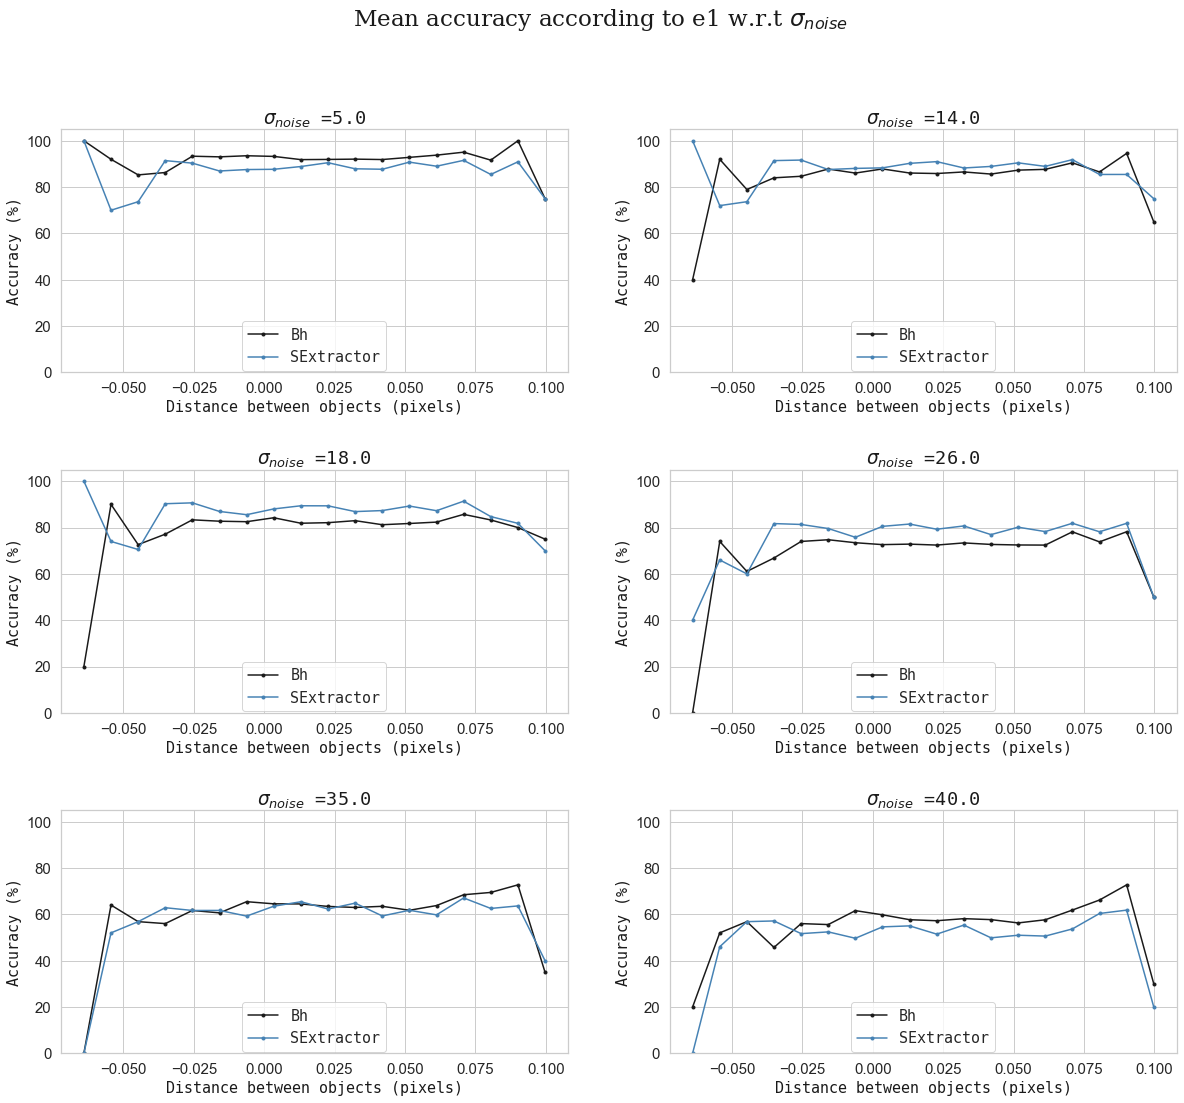

In [35]:
#Seaborn theme
sns.set(context='notebook', style='whitegrid', palette='deep')
#Font dictionnary
font = {'family': 'monospace',
        'color':  'k',
        'weight': 'normal',
        'size': 15}
#Start plot
fig, ax = plt.subplots(3,2,figsize=(20,17), sharex=False)
#Title
fig.suptitle('Mean accuracy according to e1 w.r.t $\sigma_{noise}$', 
             fontdict = {'family': 'serif','color':  'k','weight': 'heavy','size': 23}, fontsize=23)
#First subplot 
ax[0,0].set_title('$\sigma_{noise}$ =5.0', fontdict=font, fontsize=18.5)
ax[0,0].plot(mean_e1, 100*(1-mean_ratios_e1[0]), color = 'k', marker='.', label='Bh')
ax[0,0].plot(mean_e1, 100*(1-mean_ratios_e1_sep[0]), color = 'steelblue', marker='.', label='SExtractor')
ax[0,0].set_ylabel('Accuracy (%)', fontdict = font)
ax[0,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[0,0].set_ylim(0,105)
ax[0,0].tick_params(axis='both', which='major', labelsize=15)
ax[0,0].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#Second subplot 
ax[0,1].set_title('$\sigma_{noise}$ =14.0', fontdict=font, fontsize=18.5)
ax[0,1].plot(mean_e1, 100*(1-mean_ratios_e1[1]), color = 'k', marker='.', label='Bh')
ax[0,1].plot(mean_e1, 100*(1-mean_ratios_e1_sep[1]), color = 'steelblue', marker='.', label='SExtractor')
ax[0,1].set_ylabel('Accuracy (%)', fontdict = font)
ax[0,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[0,1].set_ylim(0,105)
ax[0,1].tick_params(axis='both', which='major', labelsize=15)
ax[0,1].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#3rd subplot 
ax[1,0].set_title('$\sigma_{noise}$ =18.0', fontdict=font, fontsize=18.5)
ax[1,0].plot(mean_e1, 100*(1-mean_ratios_e1[2]), color = 'k', marker='.', label='Bh')
ax[1,0].plot(mean_e1, 100*(1-mean_ratios_e1_sep[2]), color = 'steelblue', marker='.', label='SExtractor')
ax[1,0].set_ylabel('Accuracy (%)', fontdict = font)
ax[1,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[1,0].set_ylim(0,105)
ax[1,0].tick_params(axis='both', which='major', labelsize=15)
ax[1,0].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#4th subplot 
ax[1,1].set_title('$\sigma_{noise}$ =26.0', fontdict=font, fontsize=18.5)
ax[1,1].plot(mean_e1, 100*(1-mean_ratios_e1[3]), color = 'k', marker='.', label='Bh')
ax[1,1].plot(mean_e1, 100*(1-mean_ratios_e1_sep[3]), color = 'steelblue', marker='.', label='SExtractor')
ax[1,1].set_ylabel('Accuracy (%)', fontdict = font)
ax[1,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[1,1].set_ylim(0,105)
ax[1,1].tick_params(axis='both', which='major', labelsize=15)
ax[1,1].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#5th subplot 
ax[2,0].set_title('$\sigma_{noise}$ =35.0', fontdict=font, fontsize=18.5)
ax[2,0].plot(mean_e1, 100*(1-mean_ratios_e1[4]),color = 'k', marker='.', label='Bh')
ax[2,0].plot(mean_e1, 100*(1-mean_ratios_e1_sep[4]), color = 'steelblue', marker='.', label='SExtractor')
ax[2,0].set_ylabel('Accuracy (%)', fontdict = font)
ax[2,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[2,0].set_ylim(0,105)
ax[2,0].tick_params(axis='both', which='major', labelsize=15)
ax[2,0].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#6th subplot 
ax[2,1].set_title('$\sigma_{noise}$ =40.0', fontdict=font, fontsize=18.5)
x=ax[2,1].plot(mean_e1, 100*(1-mean_ratios_e1[5]), color = 'k', marker='.', label='Bh')
y=ax[2,1].plot(mean_e1, 100*(1-mean_ratios_e1_sep[5]), color = 'steelblue', marker='.', label='SExtractor')
ax[2,1].set_ylabel('Accuracy (%)', fontdict = font)
ax[2,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[2,1].set_ylim(0,105)
ax[2,1].tick_params(axis='both', which='major', labelsize=15)
ax[2,1].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#Add legend
#labels_legend=["Bh", 'SExtractor', 'Gain on SExtractor']
plt.subplots_adjust(hspace=0.4)
#fig.legend([x,y,z], labels=labels_legend, borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})
plt.show()

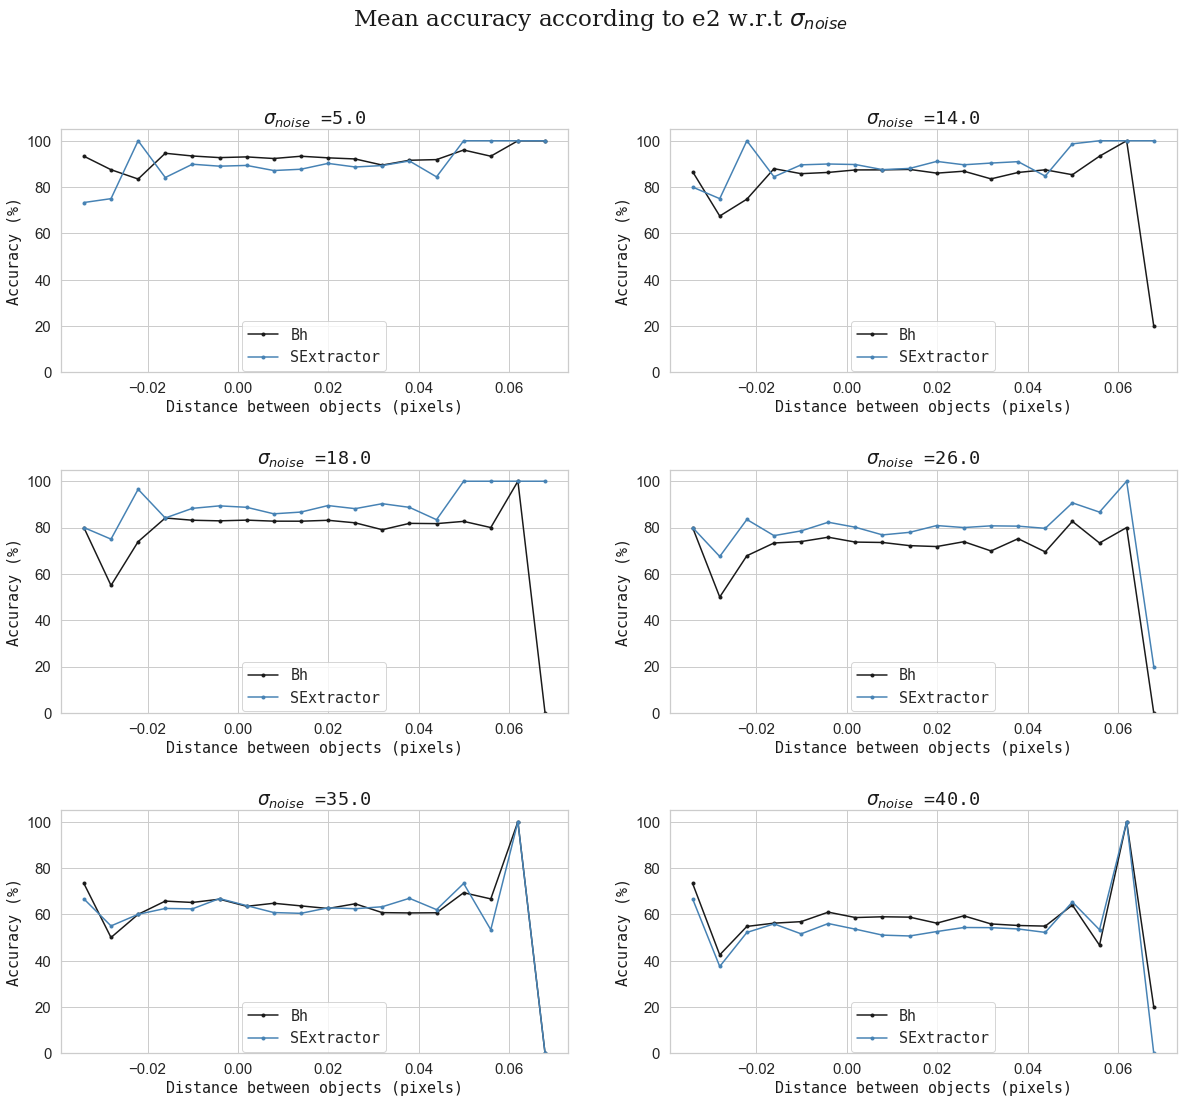

In [34]:
#Seaborn theme
sns.set(context='notebook', style='whitegrid', palette='deep')
#Font dictionnary
font = {'family': 'monospace',
        'color':  'k',
        'weight': 'normal',
        'size': 15}
#Start plot
fig, ax = plt.subplots(3,2,figsize=(20,17), sharex=False)
#Title
fig.suptitle('Mean accuracy according to e2 w.r.t $\sigma_{noise}$', 
             fontdict = {'family': 'serif','color':  'k','weight': 'heavy','size': 23}, fontsize=23)
#First subplot 
ax[0,0].set_title('$\sigma_{noise}$ =5.0', fontdict=font, fontsize=18.5)
ax[0,0].plot(mean_e2, 100*(1-mean_ratios_e2[0]), color = 'k', marker='.', label='Bh')
ax[0,0].plot(mean_e2, 100*(1-mean_ratios_e2_sep[0]), color = 'steelblue', marker='.', label='SExtractor')
ax[0,0].set_ylabel('Accuracy (%)', fontdict = font)
ax[0,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[0,0].set_ylim(0,105)
ax[0,0].tick_params(axis='both', which='major', labelsize=15)
ax[0,0].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#Second subplot 
ax[0,1].set_title('$\sigma_{noise}$ =14.0', fontdict=font, fontsize=18.5)
ax[0,1].plot(mean_e2, 100*(1-mean_ratios_e2[1]), color = 'k', marker='.', label='Bh')
ax[0,1].plot(mean_e2, 100*(1-mean_ratios_e2_sep[1]), color = 'steelblue', marker='.', label='SExtractor')
ax[0,1].set_ylabel('Accuracy (%)', fontdict = font)
ax[0,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[0,1].set_ylim(0,105)
ax[0,1].tick_params(axis='both', which='major', labelsize=15)
ax[0,1].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#3rd subplot 
ax[1,0].set_title('$\sigma_{noise}$ =18.0', fontdict=font, fontsize=18.5)
ax[1,0].plot(mean_e2, 100*(1-mean_ratios_e2[2]), color = 'k', marker='.', label='Bh')
ax[1,0].plot(mean_e2, 100*(1-mean_ratios_e2_sep[2]), color = 'steelblue', marker='.', label='SExtractor')
ax[1,0].set_ylabel('Accuracy (%)', fontdict = font)
ax[1,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[1,0].set_ylim(0,105)
ax[1,0].tick_params(axis='both', which='major', labelsize=15)
ax[1,0].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#4th subplot 
ax[1,1].set_title('$\sigma_{noise}$ =26.0', fontdict=font, fontsize=18.5)
ax[1,1].plot(mean_e2, 100*(1-mean_ratios_e2[3]), color = 'k', marker='.', label='Bh')
ax[1,1].plot(mean_e2, 100*(1-mean_ratios_e2_sep[3]), color = 'steelblue', marker='.', label='SExtractor')
ax[1,1].set_ylabel('Accuracy (%)', fontdict = font)
ax[1,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[1,1].set_ylim(0,105)
ax[1,1].tick_params(axis='both', which='major', labelsize=15)
ax[1,1].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#5th subplot 
ax[2,0].set_title('$\sigma_{noise}$ =35.0', fontdict=font, fontsize=18.5)
ax[2,0].plot(mean_e2, 100*(1-mean_ratios_e2[4]),color = 'k', marker='.', label='Bh')
ax[2,0].plot(mean_e2, 100*(1-mean_ratios_e2_sep[4]), color = 'steelblue', marker='.', label='SExtractor')
ax[2,0].set_ylabel('Accuracy (%)', fontdict = font)
ax[2,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[2,0].set_ylim(0,105)
ax[2,0].tick_params(axis='both', which='major', labelsize=15)
ax[2,0].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#6th subplot 
ax[2,1].set_title('$\sigma_{noise}$ =40.0', fontdict=font, fontsize=18.5)
x=ax[2,1].plot(mean_e2, 100*(1-mean_ratios_e2[5]), color = 'k', marker='.', label='Bh')
y=ax[2,1].plot(mean_e2, 100*(1-mean_ratios_e2_sep[5]), color = 'steelblue', marker='.', label='SExtractor')
ax[2,1].set_ylabel('Accuracy (%)', fontdict = font)
ax[2,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[2,1].set_ylim(0,105)
ax[2,1].tick_params(axis='both', which='major', labelsize=15)
ax[2,1].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#Add legend
plt.subplots_adjust(hspace=0.4)
plt.show()